In [745]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [746]:
#đọc file CSV
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [747]:
#Hiển thị 5 dòng đầu tiên trong data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [748]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [749]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [750]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [751]:
#Vì có những cột Tenure(số tháng khách hàng đã ở lại) == 0 nên sẽ phải lọc các bản ghi đó ra
data[data.tenure != 0].info()
# Có 11 bản ghi
data = data[data.tenure != 0]

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [752]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [753]:
# Chuyển đỏi kiểu dữ liệu cho TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [866]:
#Chỉ lấy các dữ liệu của khách hàng đã ngưng sử dụng dịch vụ của công ty
data = data[data.Churn == 'Yes'];

In [755]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1869 non-null   object 
 1   gender            1869 non-null   object 
 2   SeniorCitizen     1869 non-null   int64  
 3   Partner           1869 non-null   object 
 4   Dependents        1869 non-null   object 
 5   tenure            1869 non-null   int64  
 6   PhoneService      1869 non-null   object 
 7   MultipleLines     1869 non-null   object 
 8   InternetService   1869 non-null   object 
 9   OnlineSecurity    1869 non-null   object 
 10  OnlineBackup      1869 non-null   object 
 11  DeviceProtection  1869 non-null   object 
 12  TechSupport       1869 non-null   object 
 13  StreamingTV       1869 non-null   object 
 14  StreamingMovies   1869 non-null   object 
 15  Contract          1869 non-null   object 
 16  PaperlessBilling  1869 non-null   object 
 17  

In [756]:
nan_df = data[data.isna().any(axis=1)]
display(nan_df.head())
print('Tổng số dòng không có dữ liệu:', nan_df.shape[0])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Tổng số dòng không có dữ liệu: 0


# Thông tin của từng cột

In [758]:
labels = data.columns[1:]
print(labels)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [759]:
for i in labels:
    print(data[i].value_counts(),'\n');

gender
Female    939
Male      930
Name: count, dtype: int64 

SeniorCitizen
0    1393
1     476
Name: count, dtype: int64 

Partner
No     1200
Yes     669
Name: count, dtype: int64 

Dependents
No     1543
Yes     326
Name: count, dtype: int64 

tenure
1     380
2     123
3      94
4      83
5      64
     ... 
60      6
72      6
62      5
64      4
63      4
Name: count, Length: 72, dtype: int64 

PhoneService
Yes    1699
No      170
Name: count, dtype: int64 

MultipleLines
Yes                 850
No                  849
No phone service    170
Name: count, dtype: int64 

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64 

OnlineSecurity
No                     1461
Yes                     295
No internet service     113
Name: count, dtype: int64 

OnlineBackup
No                     1233
Yes                     523
No internet service     113
Name: count, dtype: int64 

DeviceProtection
No                     1211
Yes            

# Việt hóa các dữ liệu trong bảng data

In [761]:
data['gender'] = data['gender'].replace({
    'Male' : 'Nam' ,
    'Female' : 'Nữ' ,
})

In [762]:
data['SeniorCitizen'] = data['SeniorCitizen'].replace({
    0 : 'Trẻ' ,
    1 : 'Già' 
})

In [763]:
# data['Dependents'] = data['Dependents'].replace({
#     'Yes' : 'Có phụ thuộc' ,
#     'No' : 'Không có phụ thuộc' ,
# })

In [764]:
data['Partner'] = data['Partner'].replace({
    'Yes' : 'Đã có gia đình' ,
    'No' : 'Chưa có gia đình' ,
})

In [765]:
# data['OnlineBackup'] = data['OnlineSecurity'] = data['DeviceProtection'] = data['TechSupport'] = data['StreamingMovies'] = data['StreamingTV'] = data['StreamingTV'].replace({
#     'Yes': 'Sử dụng dịch vụ',
#     'No' : 'Không sử dụng dịch vụ',
#     'No internet service' : 'Không sử dụng dịch vụ internet'
# })

In [766]:
# data['PhoneService'] = data['PhoneService'].replace({
#     'Yes': 'Sử dụng dịch vụ',
#     'No' : 'Không sử dụng dịch vụ'
# })
# data['MultipleLines'] = data['MultipleLines'].replace({
#     'Yes': 'Sử dụng dịch vụ',
#     'No' : 'Không sử dụng dịch vụ',
#     'No phone service' : 'Không sử dụng dịch vụ điện thoại'
# })
# data[data.customerID == '7590-VHVEG']

In [767]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Nam,Trẻ,Chưa có gia đình,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Nữ,Trẻ,Chưa có gia đình,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Nữ,Trẻ,Chưa có gia đình,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Nữ,Trẻ,Đã có gia đình,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Nam,Trẻ,Chưa có gia đình,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


## TRỰC QUAN HÓA CÁC DỮ LIỆU CÓ TRONG TỪNG CỘT

# Dữ liệu trong cột Giới tính

In [770]:
data['gender'].value_counts()


gender
Nữ     939
Nam    930
Name: count, dtype: int64

In [771]:
data_Gender = data['gender'].value_counts()

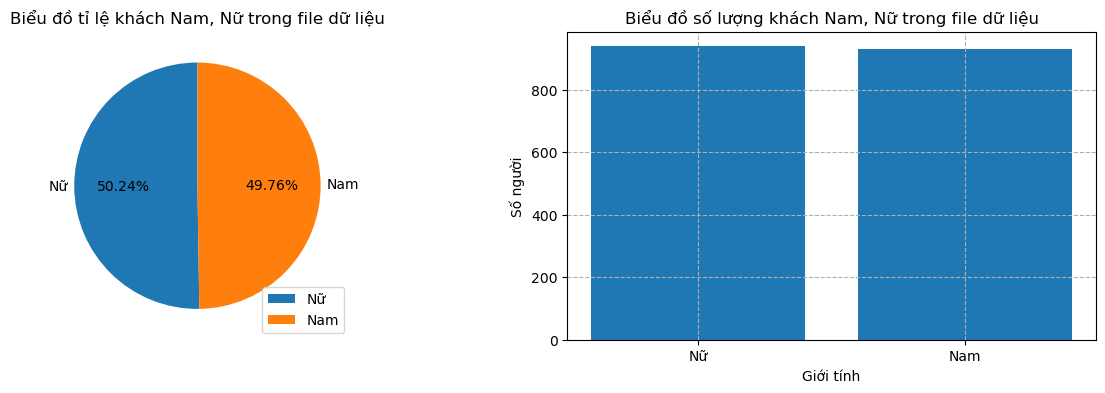

In [772]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.pie(
    data_Gender.values,
    labels = data_Gender.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05
)
plt.legend(loc=4)
plt.title("Biểu đồ tỉ lệ khách Nam, Nữ trong file dữ liệu")
plt.subplot(1,2,2)
plt.bar(
    data_Gender.index,
    data_Gender.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Giới tính')
plt.title("Biểu đồ số lượng khách Nam, Nữ trong file dữ liệu")
plt.show()

# Trực quan dữ liệu trong cột Senior Citizen(Khách hàng có là người cao tuổi hay không)

In [774]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
Trẻ    1393
Già     476
Name: count, dtype: int64

In [775]:
data_SeniorCitizen = data['SeniorCitizen'].value_counts()

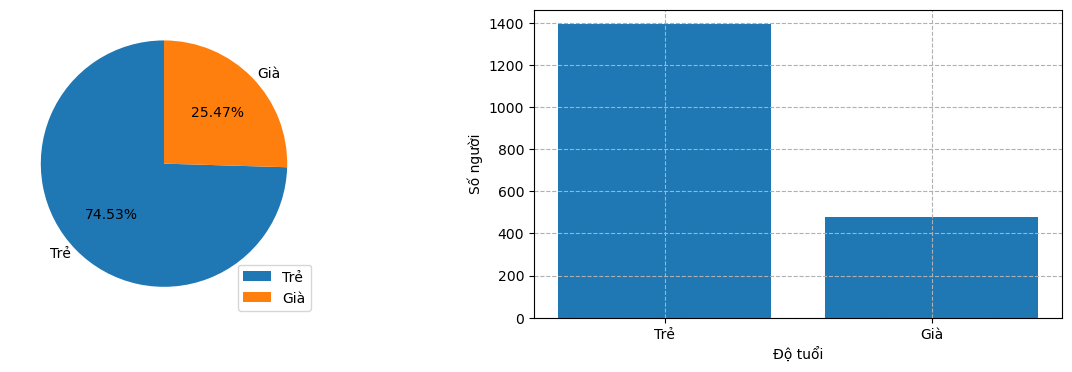

In [776]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.pie(
    data_SeniorCitizen.values,
    labels = data_SeniorCitizen.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05
)
plt.legend(loc=4)
plt.subplot(1,2,2)
plt.bar(
    data_SeniorCitizen.index,
    data_SeniorCitizen.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Độ tuổi')
plt.show()

# Trực quan dữ liệu trong cột Partner(Tình trạng hôn nhân)

In [778]:
data['Partner'].value_counts()

Partner
Chưa có gia đình    1200
Đã có gia đình       669
Name: count, dtype: int64

In [779]:
data_Partner = data['Partner'].value_counts()

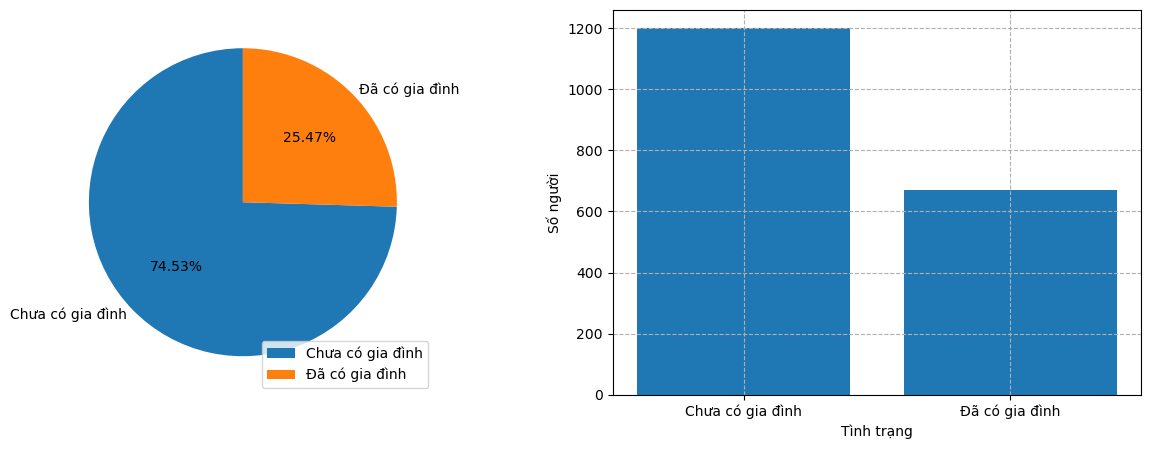

In [780]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_SeniorCitizen.values,
    labels = data_Partner.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05
)

plt.legend(loc=4)
plt.subplot(1,2,2)
plt.bar(
    data_Partner.index,
    data_Partner.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Tình trạng')
plt.show()

# Trực quan dữ liệu trong cột Tenure( Thời gian khách hàng đã sử dụng dịch vụ của công ty)

In [782]:
data_Tenure = data['tenure'].value_counts()

In [783]:
data_Tenure.sort_index()

tenure
1     380
2     123
3      94
4      83
5      64
     ... 
68      9
69      8
70     11
71      6
72      6
Name: count, Length: 72, dtype: int64

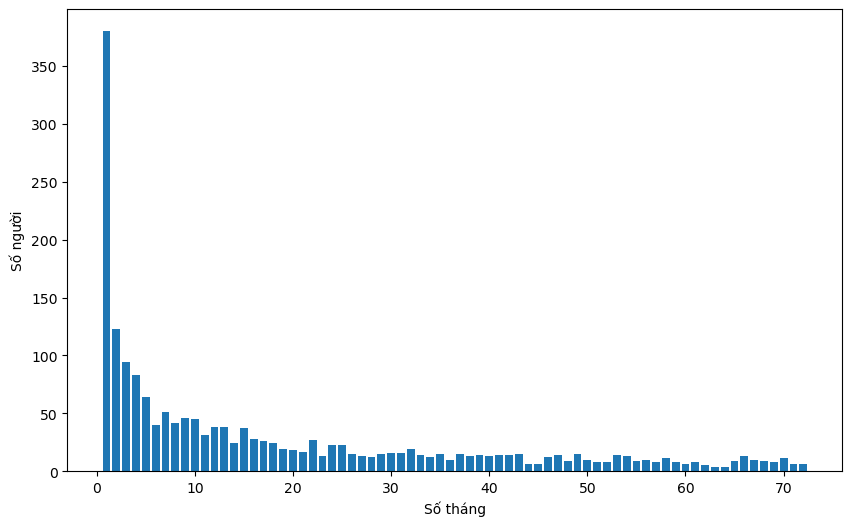

In [784]:
plt.figure(figsize=(10,6))
plt.bar(
    data_Tenure.index,
    data_Tenure.values,
)
plt.ylabel('Số người')
plt.xlabel('Số tháng')
plt.show()

# Trực quan dữ liệu cột PhoneService(Khách hàng có sử dụng dịch vụ điện thoại hay không Yes or No)

In [786]:
data_PhoneService = data['PhoneService'].value_counts()

In [787]:
data_PhoneService

PhoneService
Yes    1699
No      170
Name: count, dtype: int64

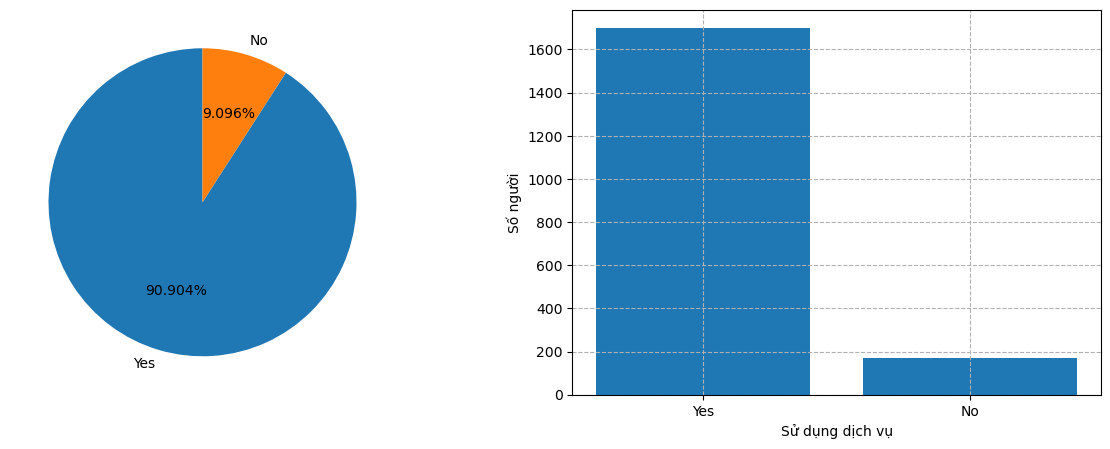

In [788]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_PhoneService.values,
    labels = data_PhoneService.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)

plt.subplot(1,2,2)
plt.bar(
    data_PhoneService.index,
    data_PhoneService.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Sử dụng dịch vụ')
plt.show()

# Trực quan dữ liệu trong cột MultipleLines( Khách hàng có sử dụng nhiều đường dây hay không)

In [790]:
data_MultipleLines = data['MultipleLines'].value_counts()

In [791]:
data_MultipleLines

MultipleLines
Yes                 850
No                  849
No phone service    170
Name: count, dtype: int64

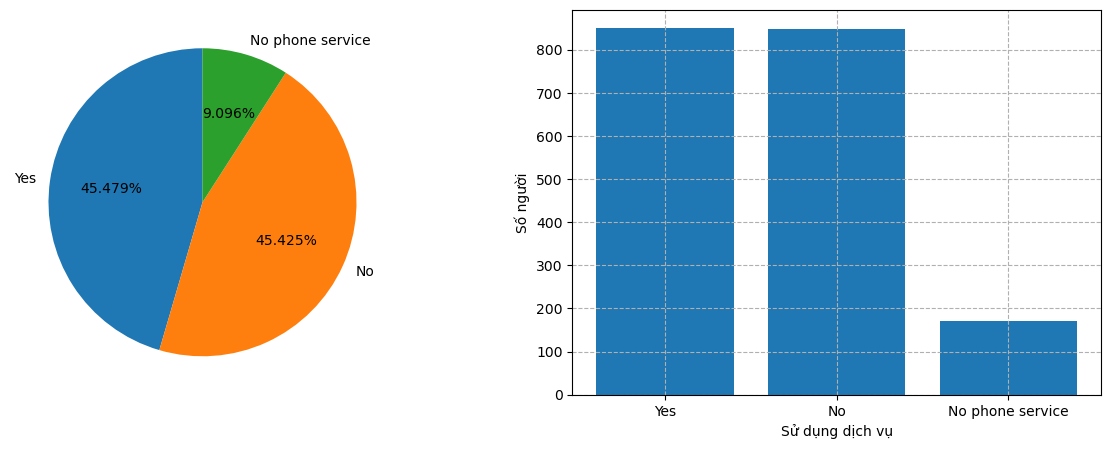

In [792]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_MultipleLines.values,
    labels = data_MultipleLines.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)

plt.subplot(1,2,2)
plt.bar(
    data_MultipleLines.index,
    data_MultipleLines.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Sử dụng dịch vụ')
plt.show()

# Trực quan các cột liên quan đến dịch vụ Online(InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSuppor, StreamingTV)'

In [794]:
labels[7:13]

Index(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV'],
      dtype='object')

InternetService


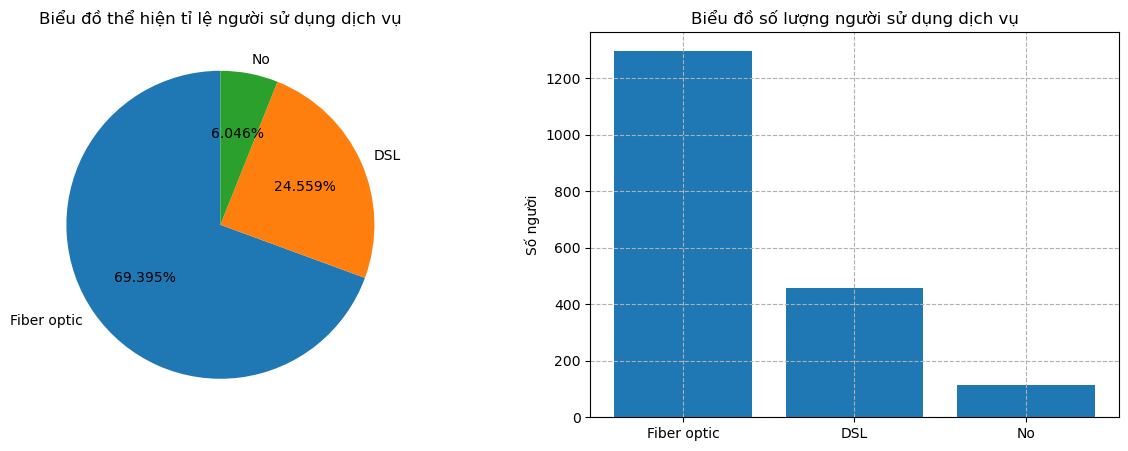

OnlineSecurity


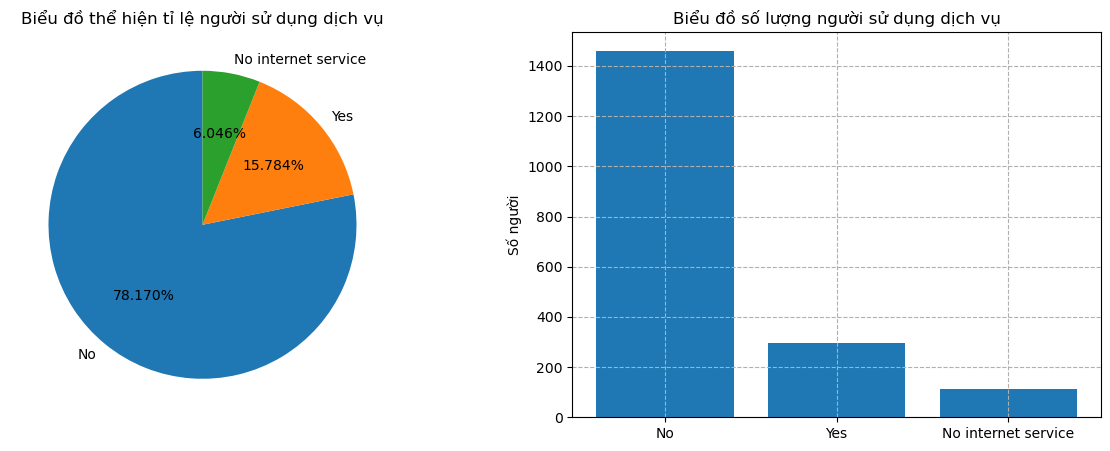

OnlineBackup


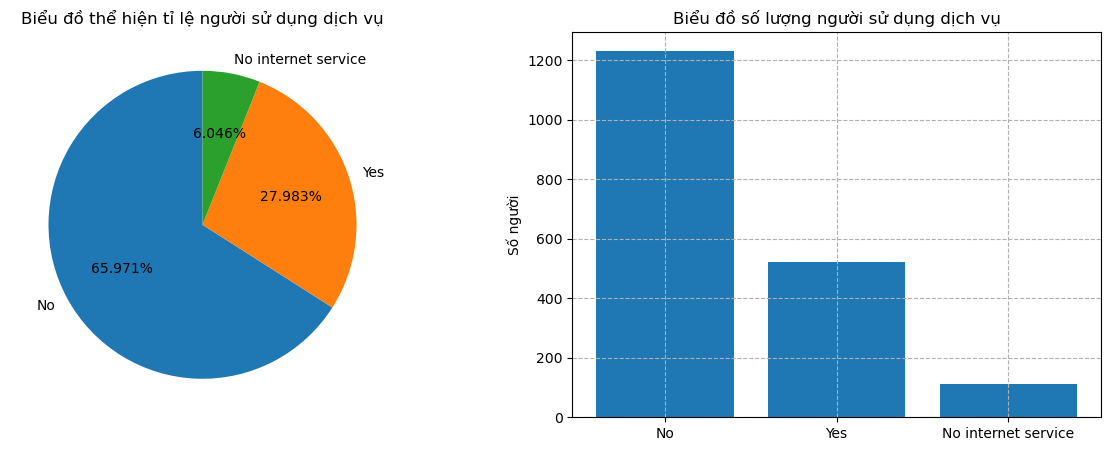

DeviceProtection


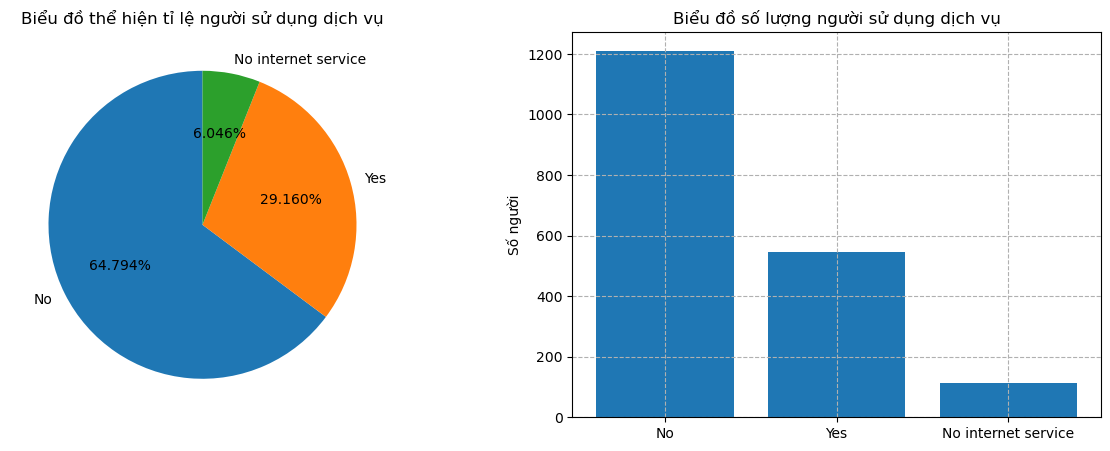

TechSupport


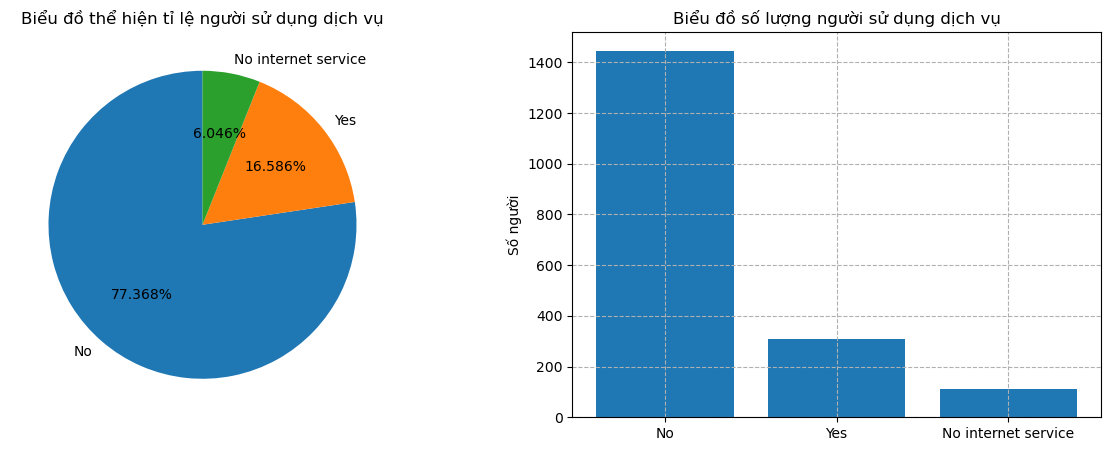

StreamingTV


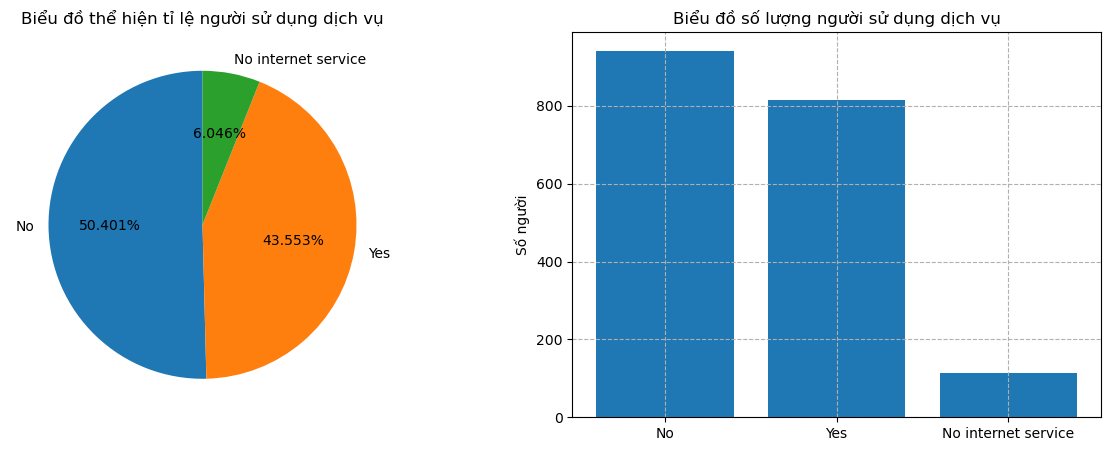

In [795]:
for i in labels[7:13]:
    temp = data[i].value_counts()
    print(i)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.pie(
        temp.values,
        labels = temp.index,
        autopct='%.3f%%',
        startangle=90,
        labeldistance=1.09
    )
    plt.title('Biểu đồ thể hiện tỉ lệ người sử dụng dịch vụ')
    plt.subplot(1,2,2)
    plt.bar(
        temp.index,
        temp.values,
    )
    plt.grid(ls='--')
    plt.ylabel('Số người')
    plt.title('Biểu đồ số lượng người sử dụng dịch vụ')
    plt.show()

# Trực quan dữ liệu trong cột Contract(Thời hạn hợp đồng của khách hàng)

In [797]:
data_Contract = data['Contract'].value_counts()

In [798]:
data_Contract

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

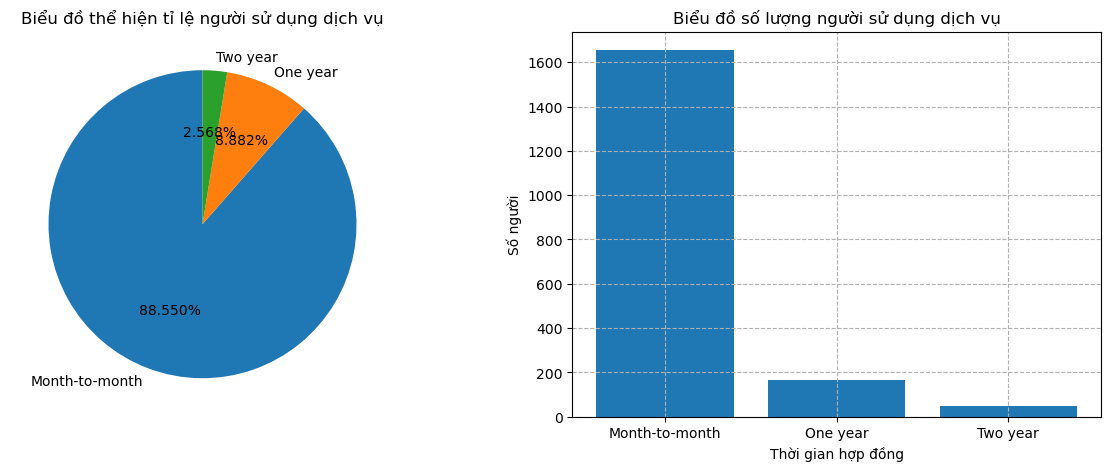

In [799]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_Contract.values,
    labels=data_Contract.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)    
plt.title('Biểu đồ thể hiện tỉ lệ người sử dụng dịch vụ')
plt.subplot(1,2,2)
plt.subplot(1,2,2)
plt.bar(
    data_Contract.index,
    data_Contract.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Thời gian hợp đồng')
plt.title('Biểu đồ số lượng người sử dụng dịch vụ')
plt.show()

# Trực quan hóa dữ liệu cột PaperlessBilling(sử dụng hóa đơn điện tử)

In [801]:
data_PaperlessBilling = data['PaperlessBilling'].value_counts();
data_PaperlessBilling

PaperlessBilling
Yes    1400
No      469
Name: count, dtype: int64

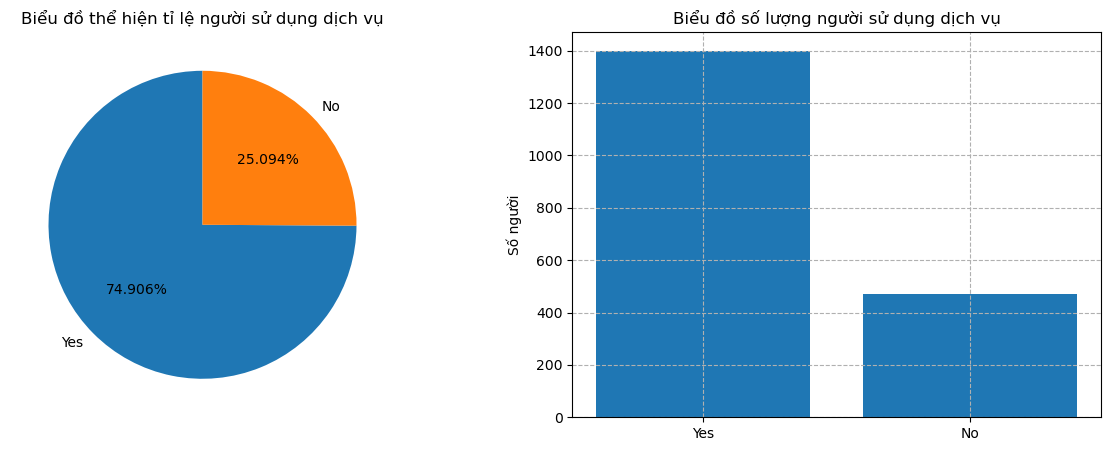

In [802]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_PaperlessBilling.values,
    labels = data_PaperlessBilling.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)    
plt.title('Biểu đồ thể hiện tỉ lệ người sử dụng dịch vụ')
plt.subplot(1,2,2)
plt.bar(
    data_PaperlessBilling.index,
    data_PaperlessBilling.values,
)
plt.grid(ls='--')
plt.title('Biểu đồ số lượng người sử dụng dịch vụ')
plt.ylabel('Số người')
plt.show()

# Trực quan hóa dữ liệu cột PaymenMethod(Phương thức thanh toán của khách hàng)

In [804]:
data_PaymenMethod = data['PaymentMethod'].value_counts()

In [805]:
data_PaymenMethod

PaymentMethod
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64

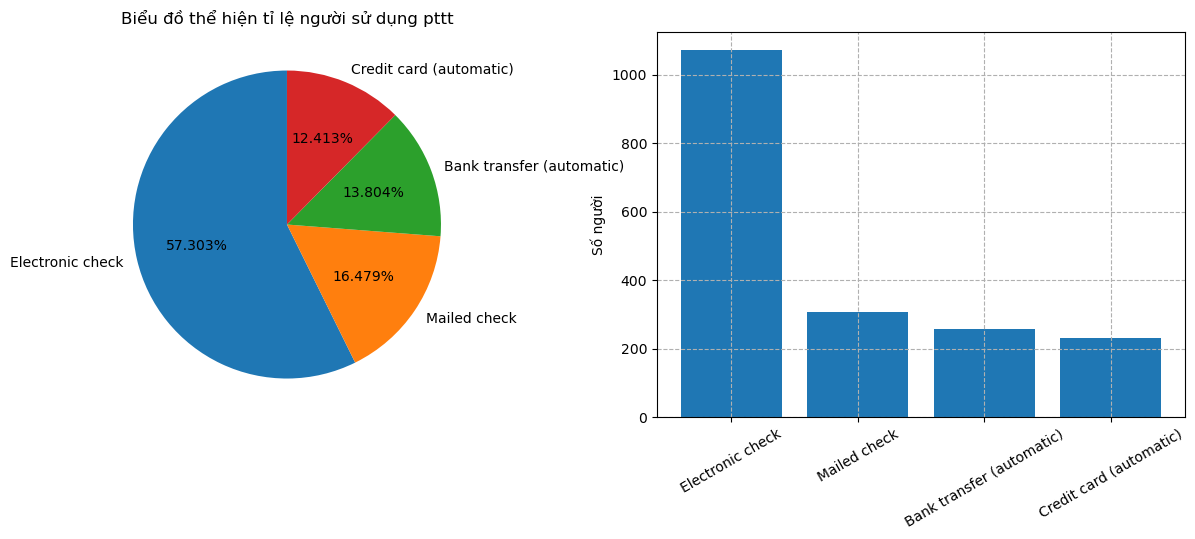

In [806]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_PaymenMethod.values,
    labels = data_PaymenMethod.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)    
plt.title('Biểu đồ thể hiện tỉ lệ người sử dụng pttt')
plt.subplot(1,2,2)
plt.bar(
    data_PaymenMethod.index,
    data_PaymenMethod.values,
)
plt.grid(ls='--')
plt.ylabel('Số người')
# plt.xlabel('Phương thức thanh toán')
plt.xticks(rotation = 30)
plt.show()

In [872]:
data_MonthlyCharges = data['MonthlyCharges'].value_counts()
data['MonthlyCharges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

In [892]:
# plt.title('Biểu đồ thể hiện số tiền mà khách hàng trả mỗi tháng')
# plt.bar(
#     data_MonthlyCharges.index,
#     data_MonthlyCharges.values,
# )
# plt.grid(ls='--')
# plt.ylabel('Số người')
# plt.xticks(rotation = 30)
# plt.show()

In [884]:
data_TotalCharges = data['TotalCharges'].value_counts()
data['TotalCharges'].describe()


count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

In [894]:
# plt.title('Biểu đồ thể hiện tổng số tiền mà khách hàng đã trả')
# plt.bar(
#     data_TotalCharges.index,
#     data_TotalCharges.values,
# )
# plt.grid(ls='--')
# plt.ylabel('Số người')
# plt.xticks(rotation = 30)
# plt.show()
# plt.figure(figsize=(15,5))
# plt.scatter(
#     data_TotalCharges.values,
#     data_TotalCharges.index,
#     alpha = 0.5
# )
# plt.title("Biểu đồ hệ số tương quan giữa 2 biến Weight và Height")
# plt.ylabel('Cân nặng (kg)')
# plt.xlabel('Chiều cao (cm)')
# plt.grid(ls='-.')
# plt.show()